In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import missingno as msno
pd.options.mode.chained_assignment = None

In [2]:
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns", 1000)

In [3]:
train_path = 'train.csv'
test_path = 'test.csv'
gender_submission_path = 'gender_submission.csv'

data_train = pd.read_csv(train_path)
data_test = pd.read_csv(test_path)
data_gender_submission = pd.read_csv(gender_submission_path)

In [4]:
print('Training data shape: ', data_train.shape)
print('Testing data shape: ', data_test.shape)

data_train.head()

Training data shape:  (891, 12)
Testing data shape:  (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

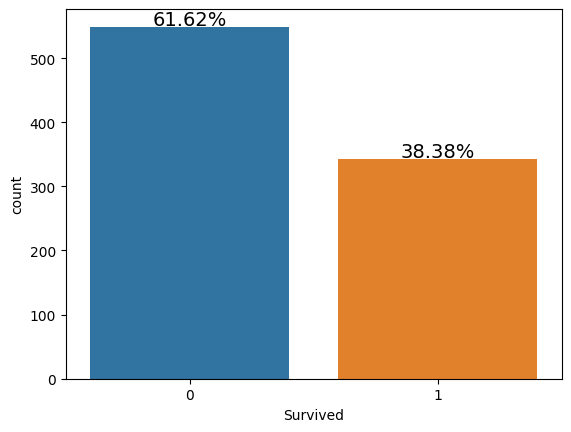

In [6]:
s = sns.countplot(x = 'Survived',data = data_train)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data_train)*100),
            ha="center", fontsize=14)

In [7]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        

        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns

In [8]:
train_missing= missing_values_table(data_train)
train_missing

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In [9]:
test_missing= missing_values_table(data_test)
test_missing

Your selected dataframe has 11 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2


<Axes: >

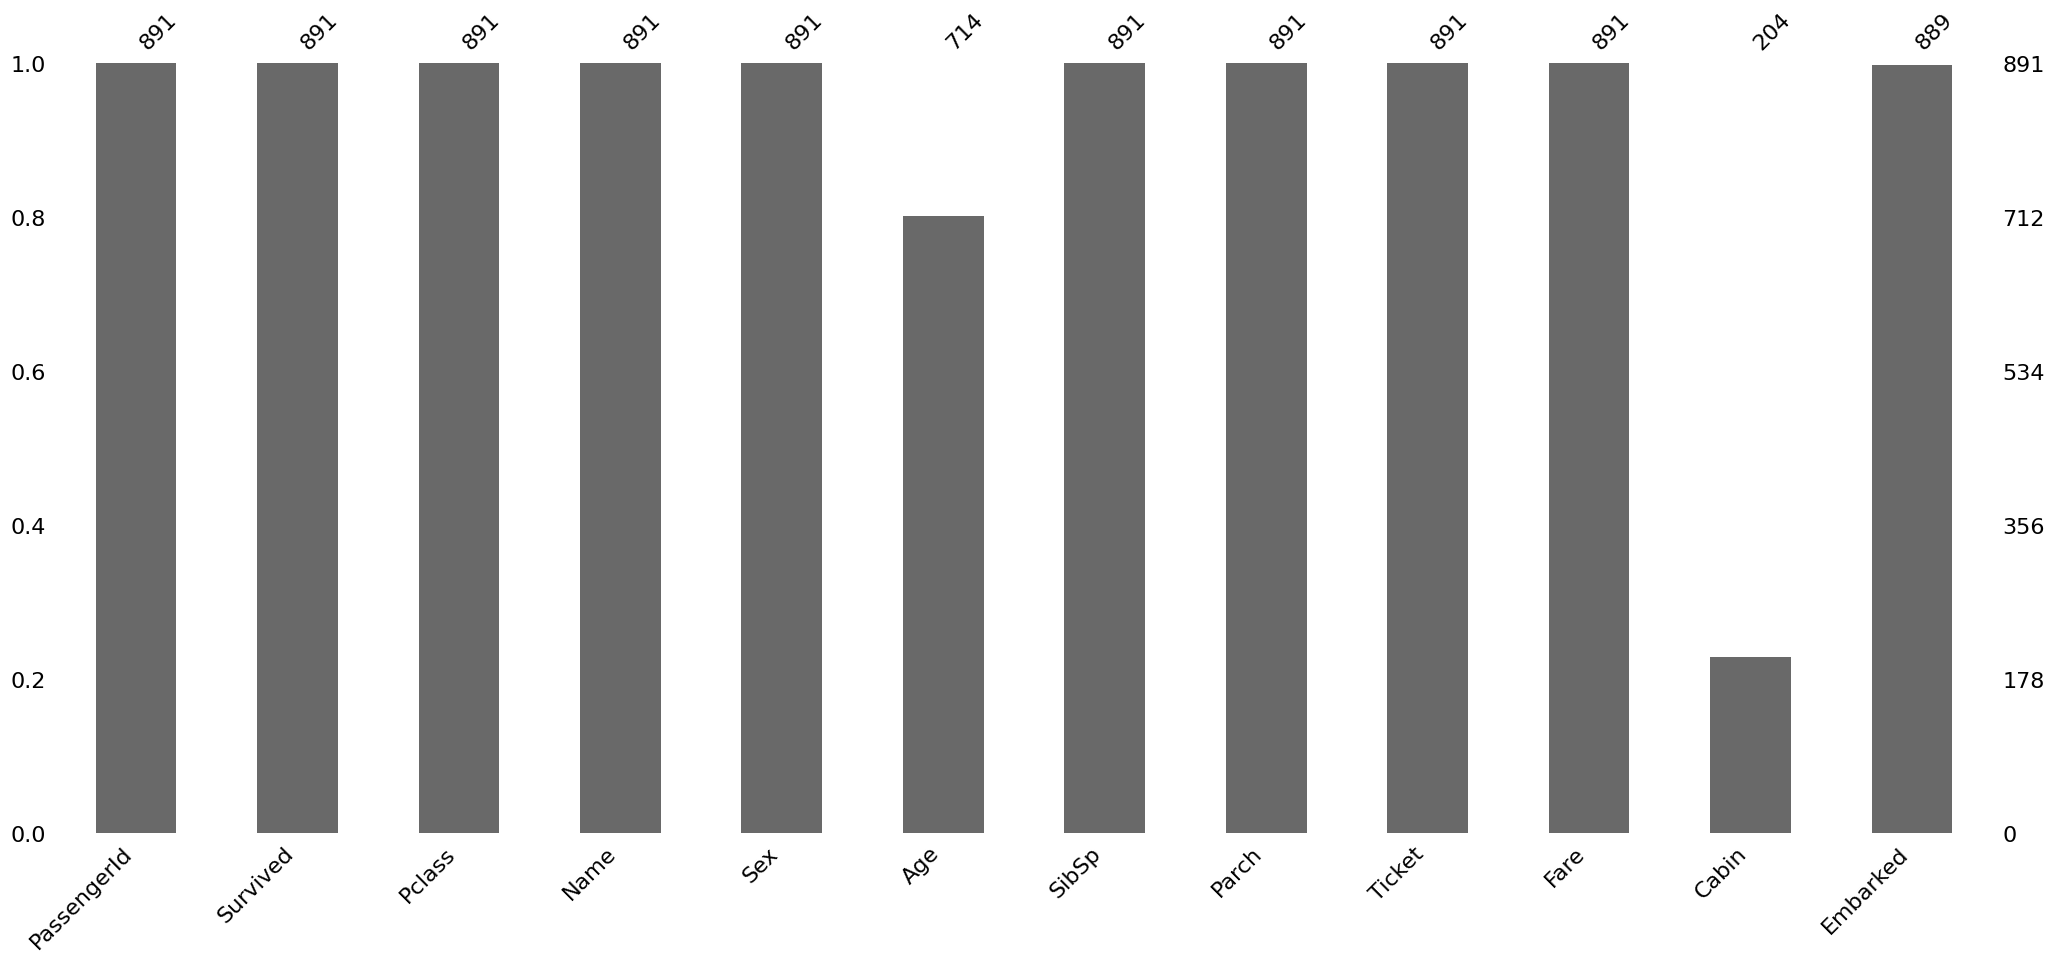

In [10]:
msno.bar(data_train)

<Axes: >

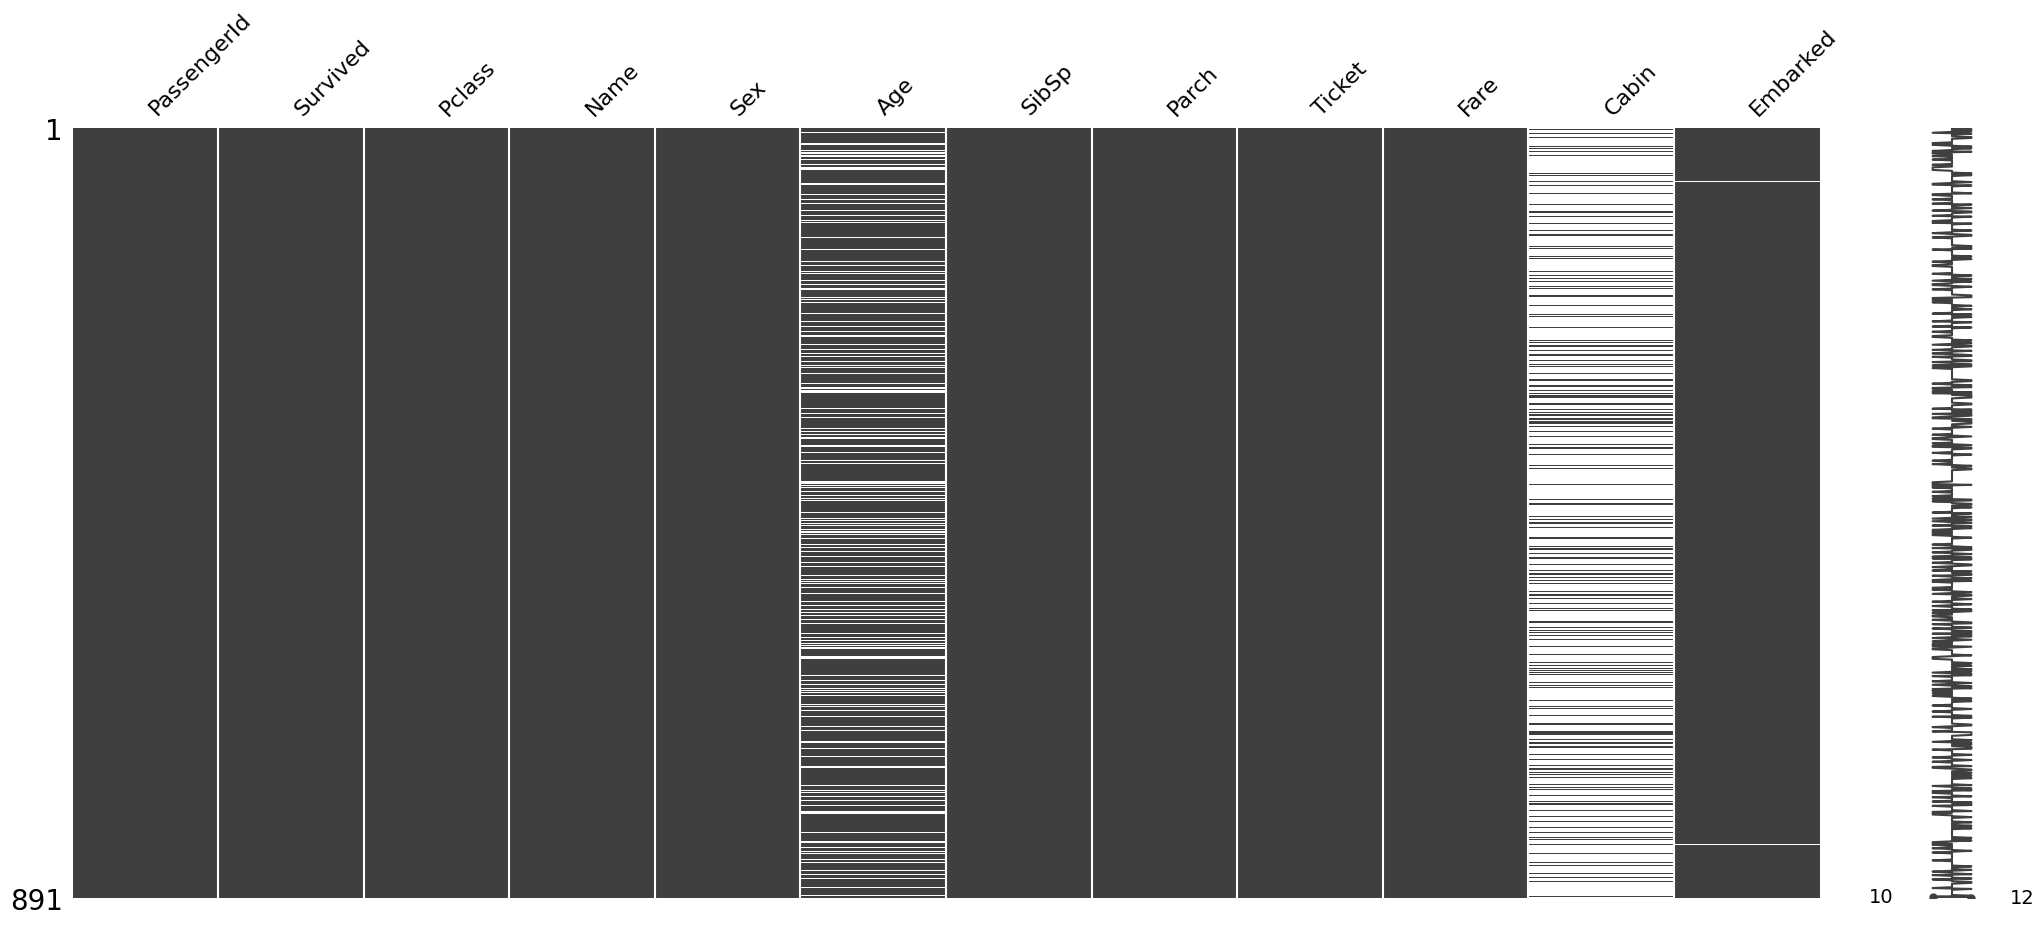

In [11]:
msno.matrix(data_train)

<Axes: >

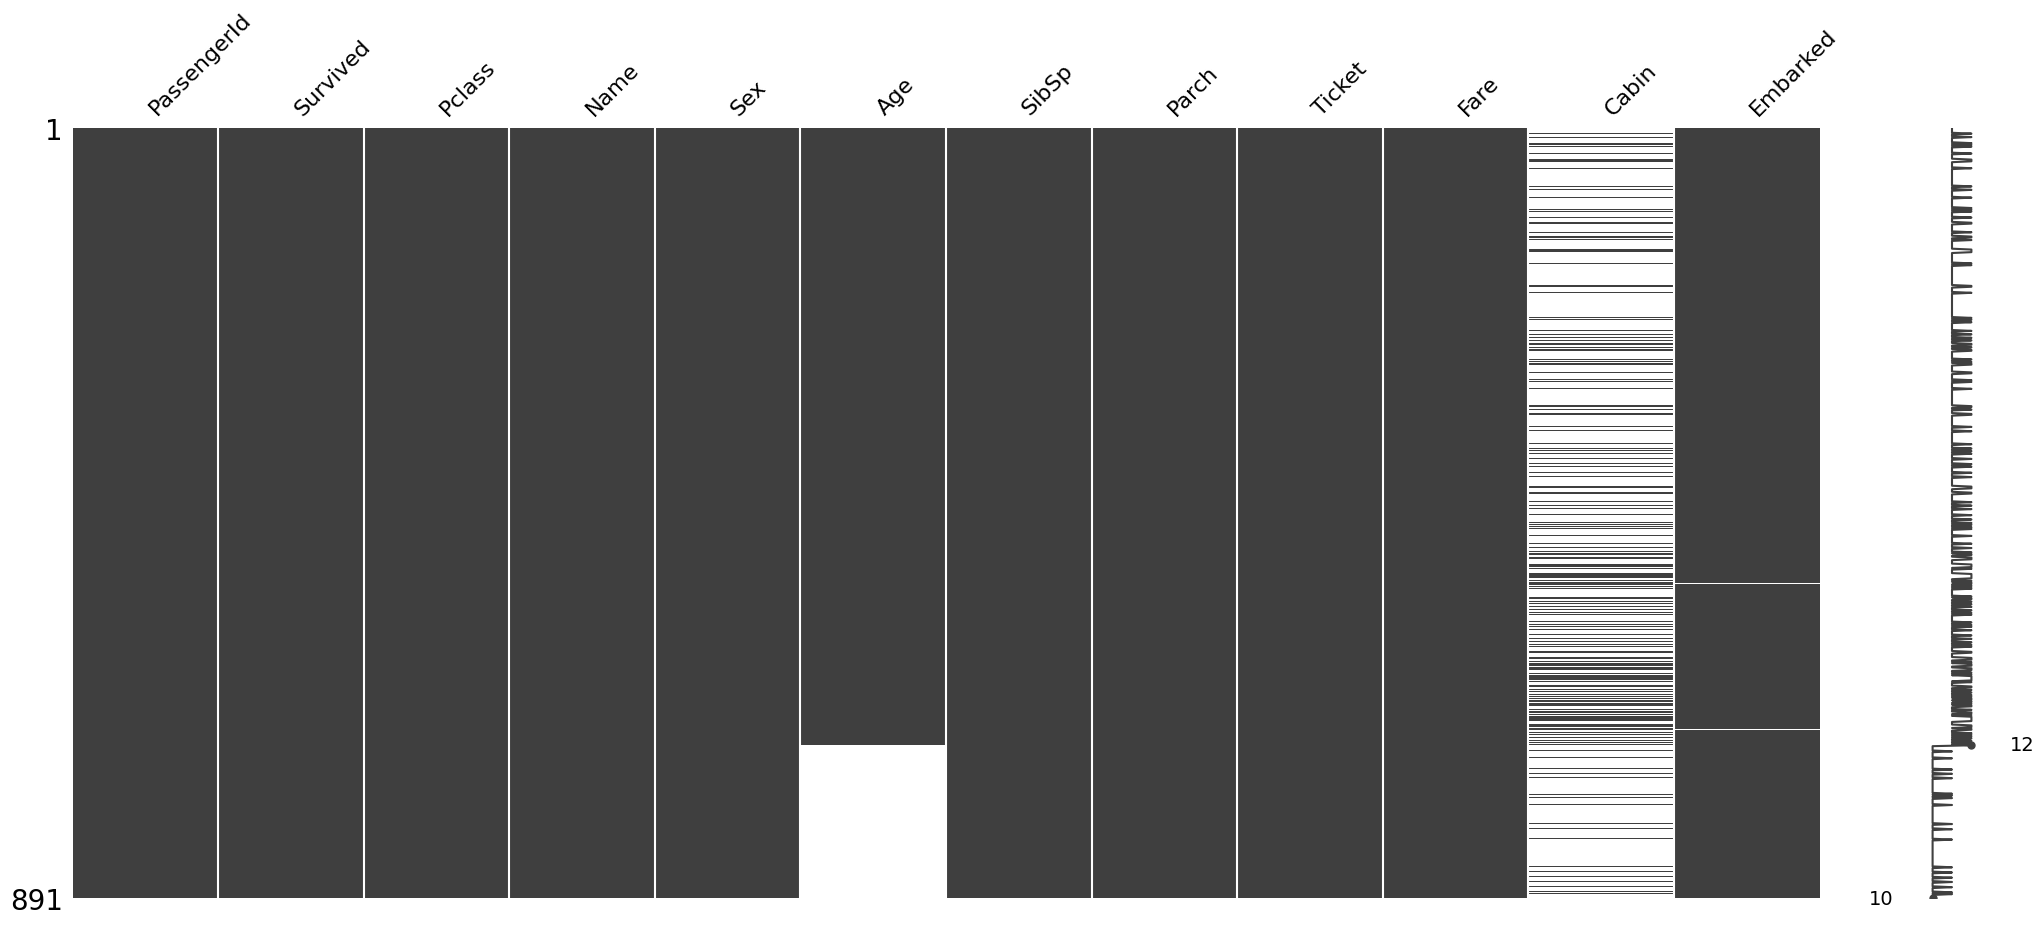

In [12]:
sorted = data_train.sort_values('Age')
msno.matrix(sorted)

<Axes: >

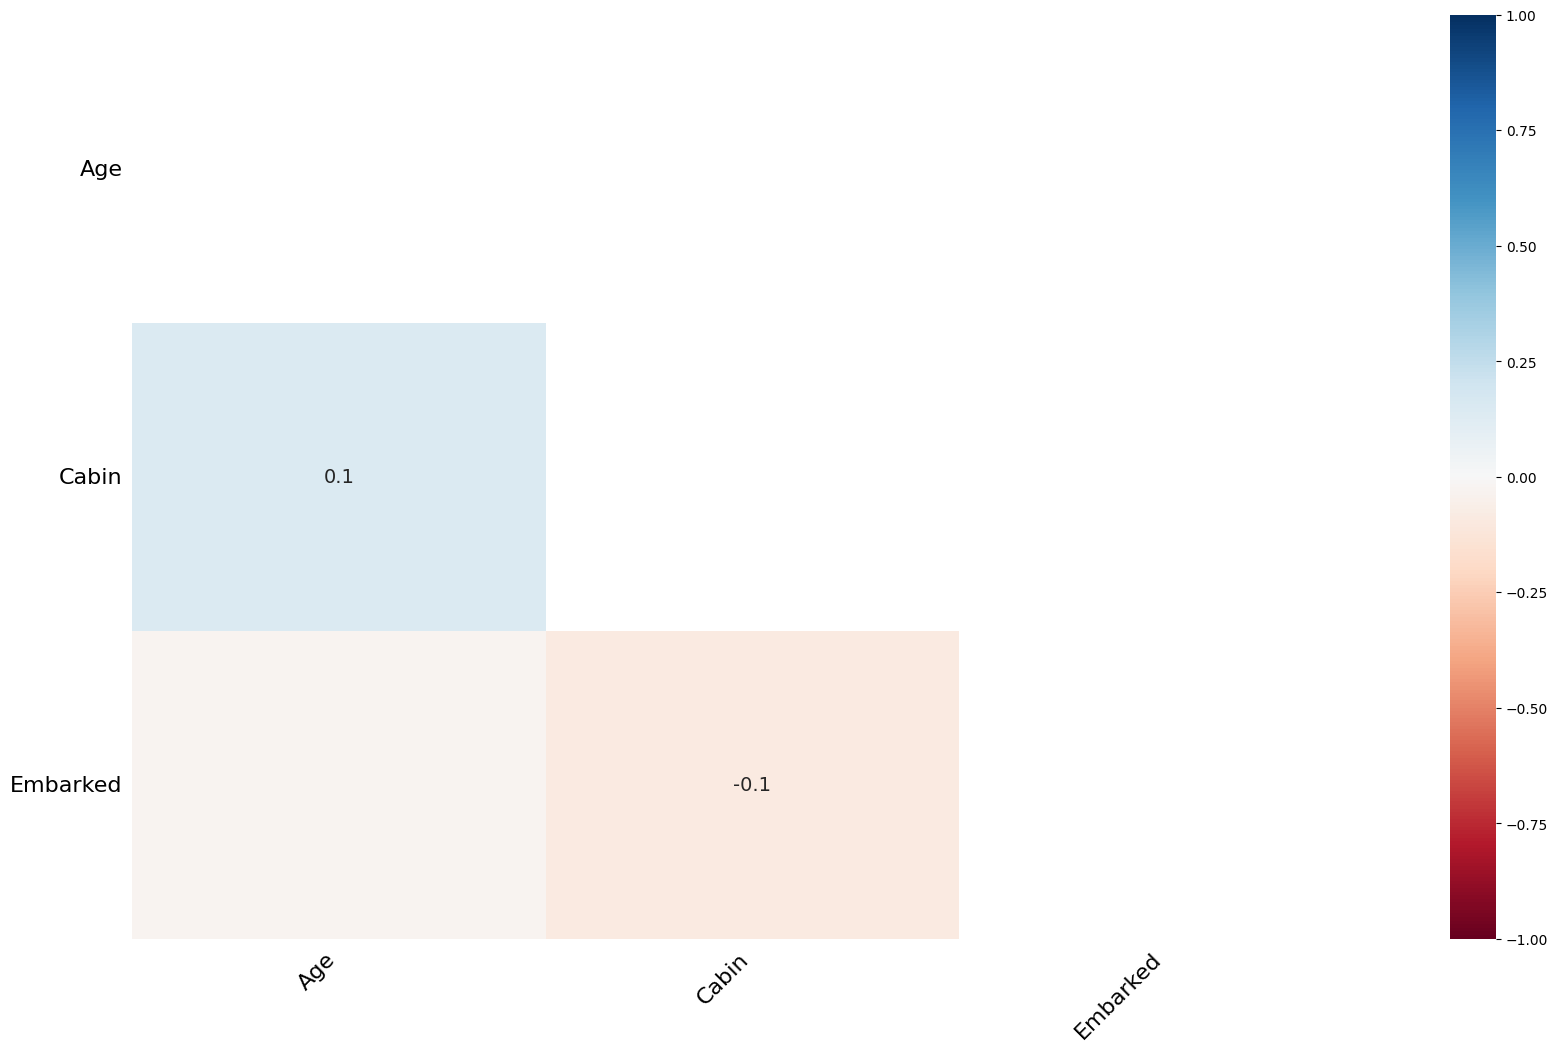

In [13]:
msno.heatmap(data_train)

<Axes: >

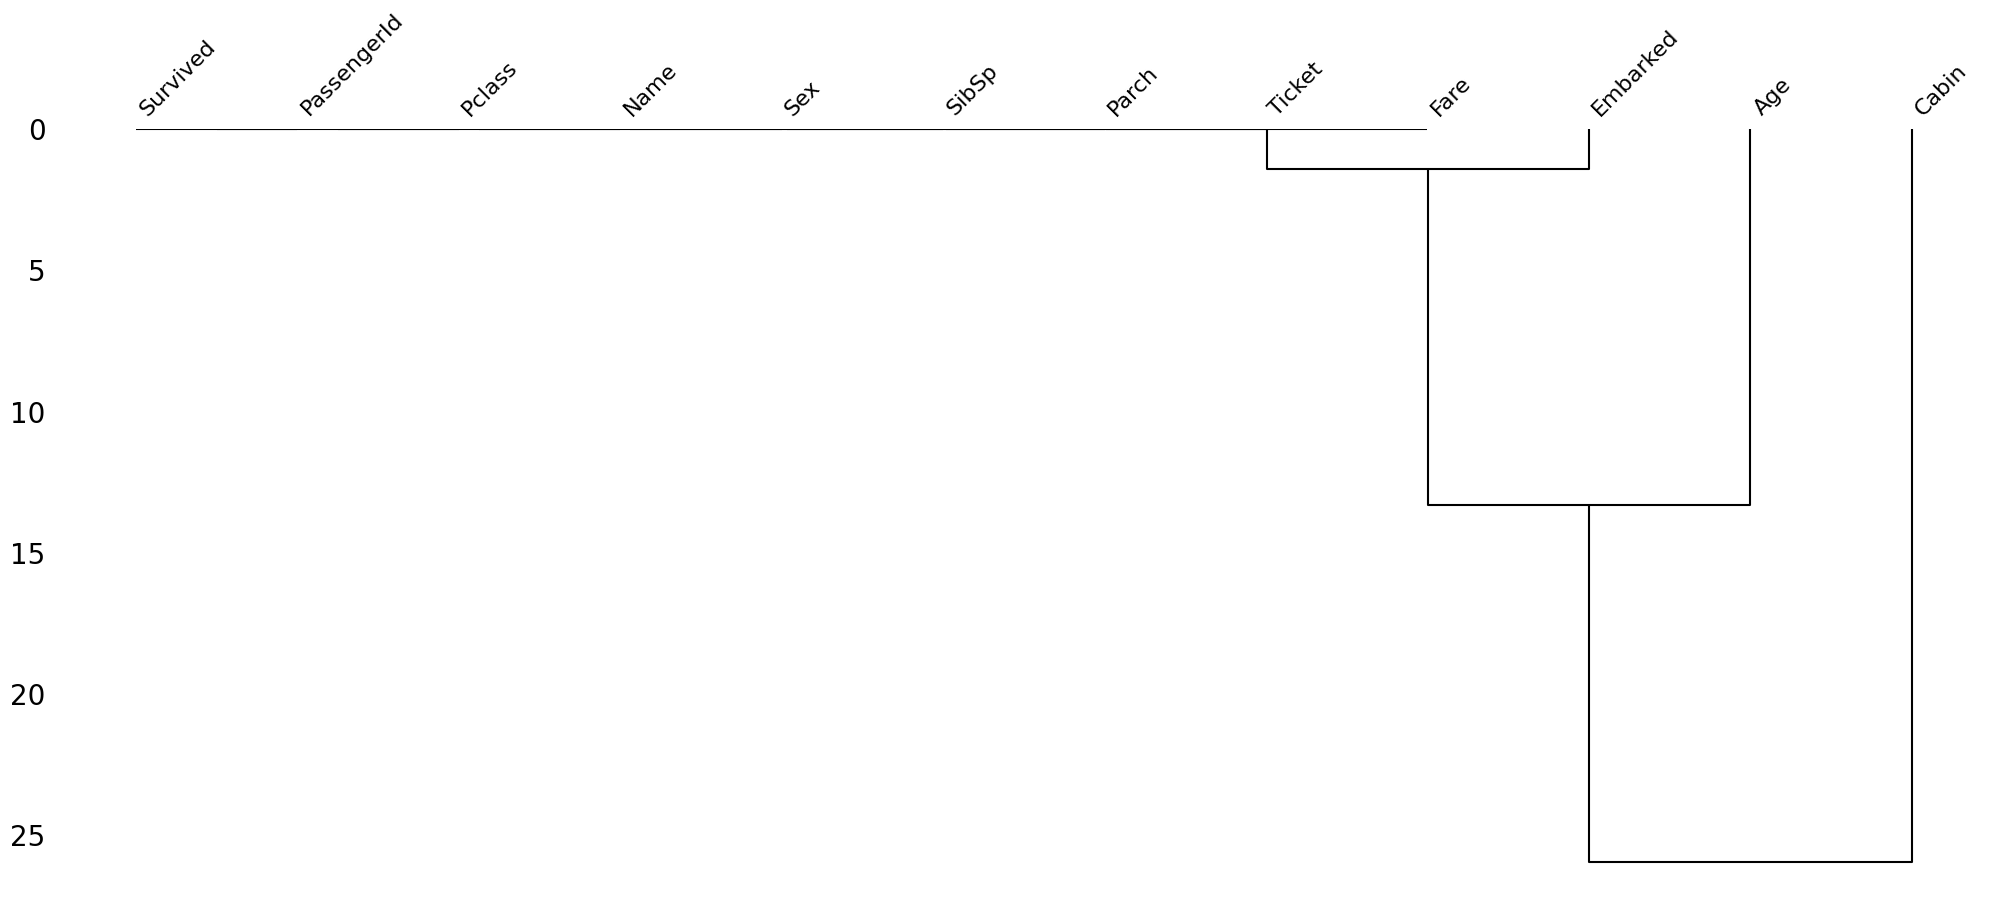

In [14]:
msno.dendrogram(data_train)

In [15]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
train_1 = data_train.copy()
train_1['Age'].mean()

29.69911764705882

In [17]:
train_1.dropna(subset=['Age'],how='any',inplace=True)
train_1['Age'].isnull().sum()

0

In [18]:

from sklearn.impute import SimpleImputer
train_constant = data_train.copy()

mean_imputer = SimpleImputer(strategy='constant')
train_constant.iloc[:,:] = mean_imputer.fit_transform(train_constant)
train_constant.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [19]:
train_most_frequent = data_train.copy()

mean_imputer = SimpleImputer(strategy='most_frequent')
train_most_frequent.iloc[:,:] = mean_imputer.fit_transform(train_most_frequent)
train_most_frequent.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [20]:
train_most_frequent

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,24.00,0,0,330877,8.4583,B96 B98,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,B96 B98,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,B96 B98,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,B96 B98,C


In [21]:
train = train_most_frequent.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [22]:
from sklearn.preprocessing import StandardScaler
data = train.values[:, 1:]
data = np.nan_to_num(data)
clus_data_set = StandardScaler().fit_transform(data)
clus_data_set

array([[-0.78927234,  0.82737724, -0.49779327,  0.43279337, -0.47367361,
        -0.50244517],
       [ 1.2669898 , -1.56610693,  0.71504807,  0.43279337, -0.47367361,
         0.78684529],
       [ 1.2669898 ,  0.82737724, -0.19458293, -0.4745452 , -0.47367361,
        -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.3461881 ,  0.43279337,  2.00893337,
        -0.17626324],
       [ 1.2669898 , -1.56610693, -0.19458293, -0.4745452 , -0.47367361,
        -0.04438104],
       [-0.78927234,  0.82737724,  0.26023257, -0.4745452 , -0.47367361,
        -0.49237783]])

In [23]:
from sklearn.cluster import KMeans
cluster_num = 4
k_means = KMeans(init='k-means++', n_clusters=cluster_num, n_init=12)
k_means.fit(data)
labels = k_means.labels_
print(labels)

[1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 3 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 3 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 2
 1 1 1 0 1 1 1 1 1 3 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 3 1 3 1 1 1 1 1 3 0 0 1 0 0 3 1 1 1 1 1 1 3 0 1 1 1 1 0 0 1 1 1 0 1 1 3
 1 0 1 0 0 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 0 1 0 1 3 1 1 3 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 3 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 

In [24]:
train["clus_km"] = labels
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,clus_km
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,1
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [25]:
train.groupby('clus_km').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
clus_km,,,,,,,
0,451.592593,0.659259,1.274074,34.207407,0.992593,0.481481,76.633240
1,444.800000,0.318621,2.557241,27.423793,0.430345,0.335172,15.273005
2,559.000000,1.000000,1.000000,35.333333,0.000000,0.333333,512.329200
3,438.000000,0.678571,1.000000,30.247143,0.714286,1.107143,204.948064


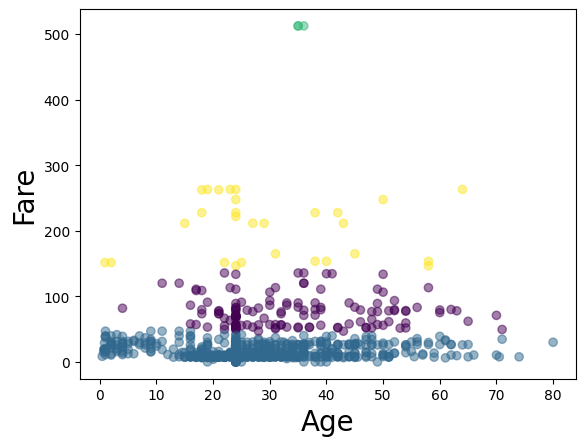

In [27]:
plt.scatter(train.iloc[:, 3], train.iloc[:, 6], c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Fare', fontsize=20)

plt.show()